In [19]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [32]:
import pandas as pd
df = pd.read_csv("/content/heart.csv", sep=";") #Checking the Orginial Data
df = df.iloc[:, 0].str.split(",", expand=True) #Splitting columns
df.columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal","target"
]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.isnull().sum() #Finding missing data
#No missing data, do not have to drop any columns

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [34]:
df.duplicated().sum()
df.drop_duplicates(inplace=True) #Removing Duplicates

In [35]:
df.dtypes #They are all objects, converting to int64
int_cols = ["age","sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "slope", "ca", "thal", "target"]
float_cols = ["oldpeak"] #Has a decimal
df[int_cols] = df[int_cols].astype(int) #Turn datatypes into an int
df[float_cols] = df[float_cols].astype(float) #Turn datatype into float
df.dtypes


,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [36]:
df.rename(columns={
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'target': 'heart_disease'
}, inplace=True) #Renaming columns for easy understanding.
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#**This shows the distribution between people with heart disease and people wihout heart disease.**

---




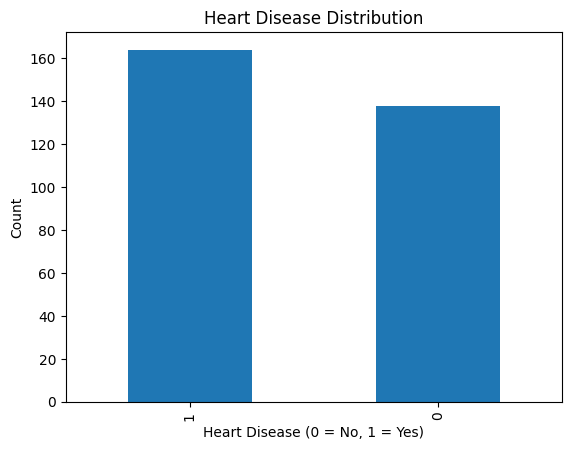

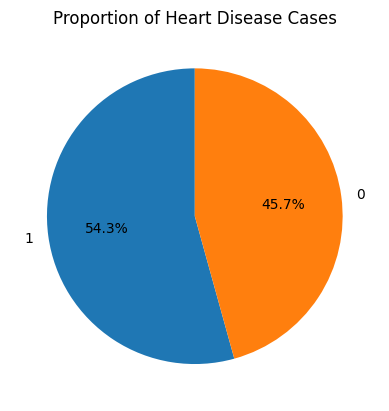

In [27]:
import matplotlib.pyplot as plt

target_counts = df['heart_disease'].value_counts()

# Bar plot
plt.figure()
target_counts.plot(kind='bar')
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Pie chart
plt.figure()
target_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Heart Disease Cases')
plt.ylabel('')
plt.show()

# **Graphs shows that the data set contains a balanced amount of people with and without heart disease. Slightly higher amount of people have heart disease comapred to people without. Slight bias.**

---



# **Histograms with categorical columns with heart disease**

---



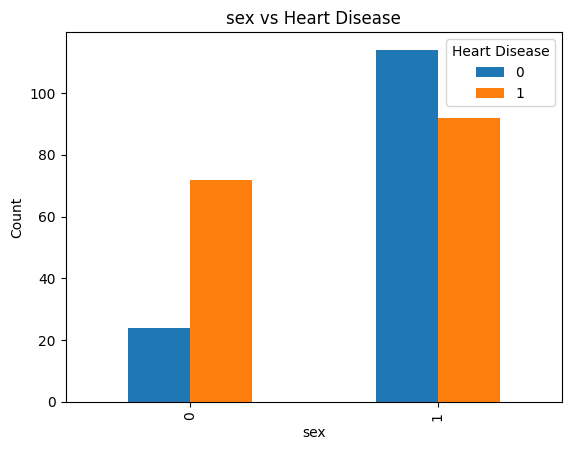

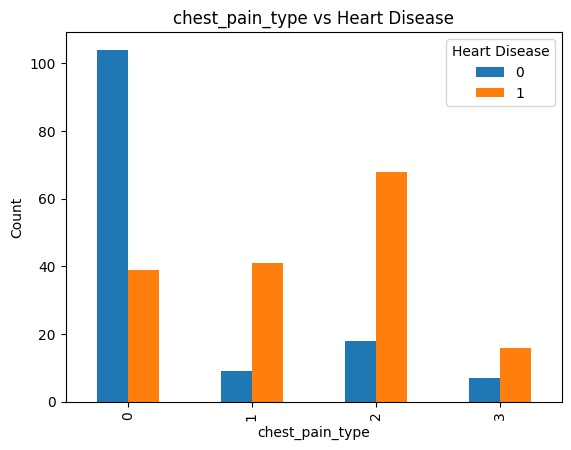

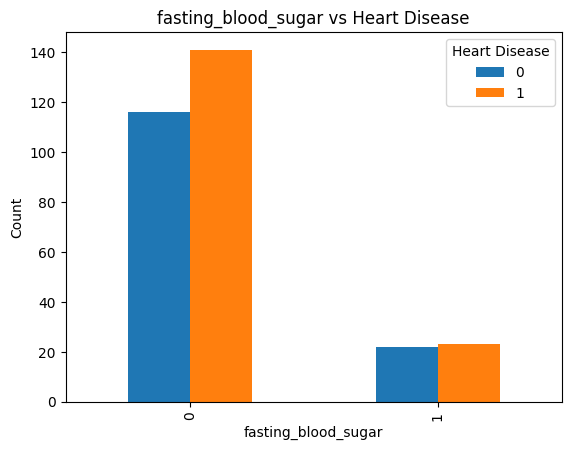

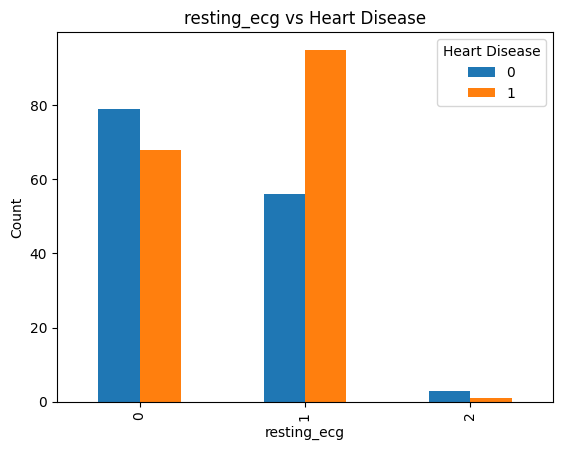

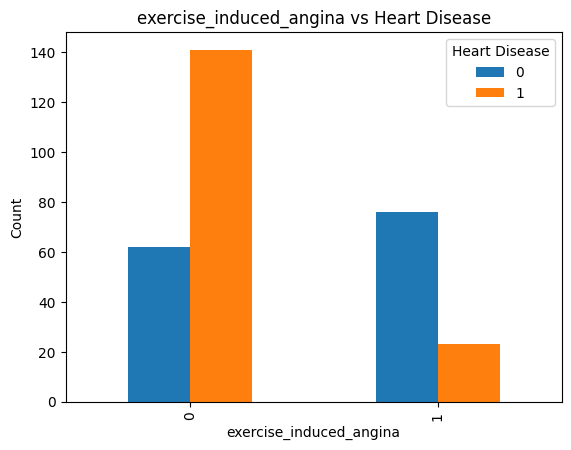

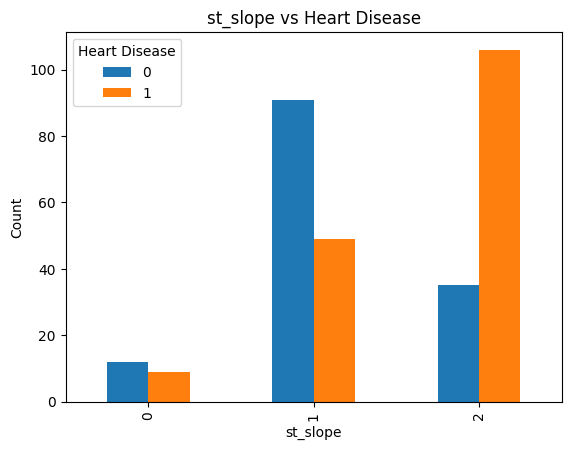

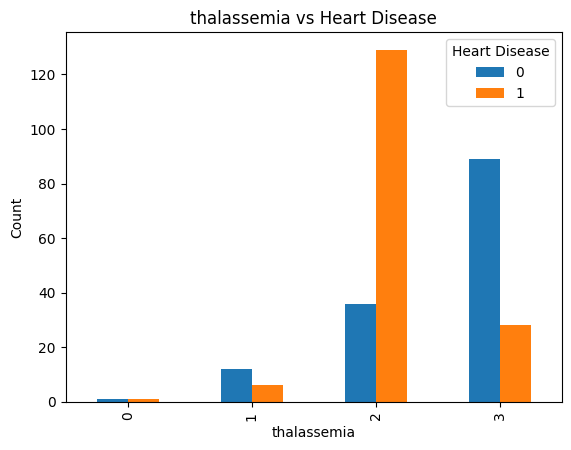

In [28]:
categorical_cols = [
    'sex', 'chest_pain_type', 'fasting_blood_sugar',
    'resting_ecg', 'exercise_induced_angina',
    'st_slope', 'thalassemia'
]

for col in categorical_cols:
    pd.crosstab(df[col], df['heart_disease']).plot(kind='bar')
    plt.title(f'{col} vs Heart Disease')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease')
    plt.show()

# By reading the graphs, we can conclude that

---



**Strong potential risk factors according to the dataset**                     

*   **Sex** (Women have double the amount of people who have heart disease compared to those who do not have it. This is very skeptical and high likely a selection bias.)
*   **Chest pain type** (Those who have chest pain have a very high chance to have heart disease)
*   **Exercise Induced Angina** (Those who do not have Exercise Induced Angina tend to have heart disease. This is very skeptical and high likely not a trusted data source.)
*   **Thalassemia** (Those with no 2 thalassemia(permanent abnormality) have  a drastically high rate of having heart disease.)
*   **St Slope** (Those  with no 2 slope, downsloping. Have a very high likely to have heart disease.)

---



**Weak potential risk factors according to the dataset**

All have an equal amount of people who have heart disease and those who do not.
*   **Fasting blood sugar**
*   **Resting ecg**

---














**Using group-by to explore risk facotrs**

In [29]:
# Heart disease grouped by chest pain type
cp_summary = df.groupby('chest_pain_type')['heart_disease'].mean()
print(cp_summary)
# Heart disease grouped by sex
sex_summary = df.groupby('sex')['heart_disease'].mean()
print(sex_summary)


chest_pain_type
0    0.272727
1    0.820000
2    0.790698
3    0.695652
Name: heart_disease, dtype: float64
sex
0    0.750000
1    0.446602
Name: heart_disease, dtype: float64


# Giving us the same conclusion as led from the histograms.

# **Heat Map for Age with its relationship with other variables/columns.**

---



/tmp/ipython-input-1957496703.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', col])['heart_disease'].mean().unstack()


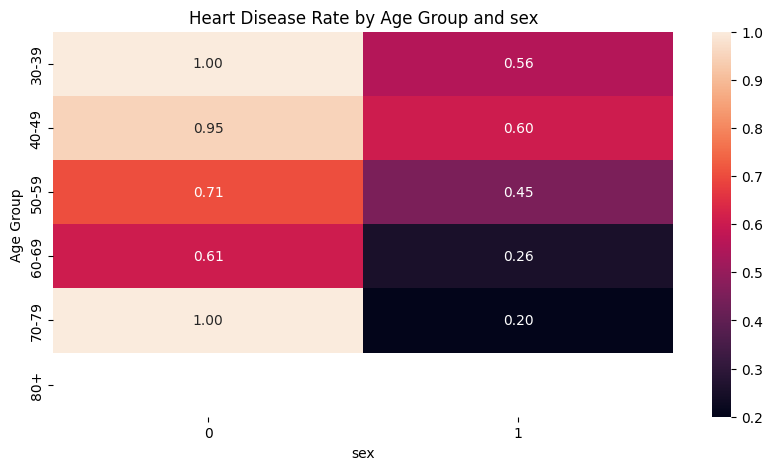

/tmp/ipython-input-1957496703.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', col])['heart_disease'].mean().unstack()


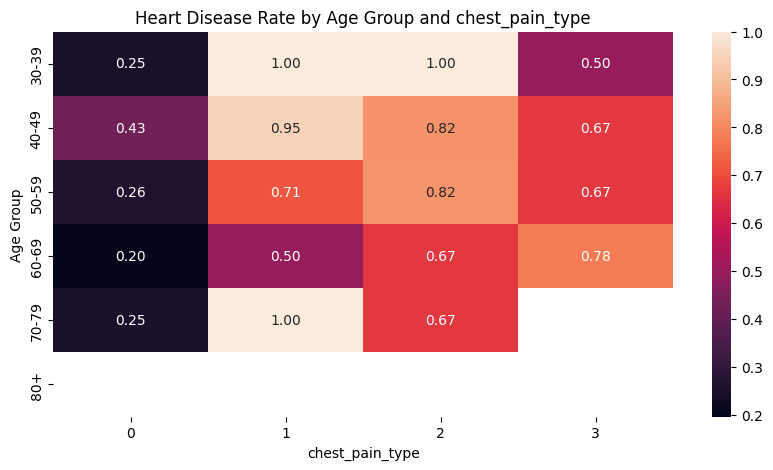

/tmp/ipython-input-1957496703.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', col])['heart_disease'].mean().unstack()


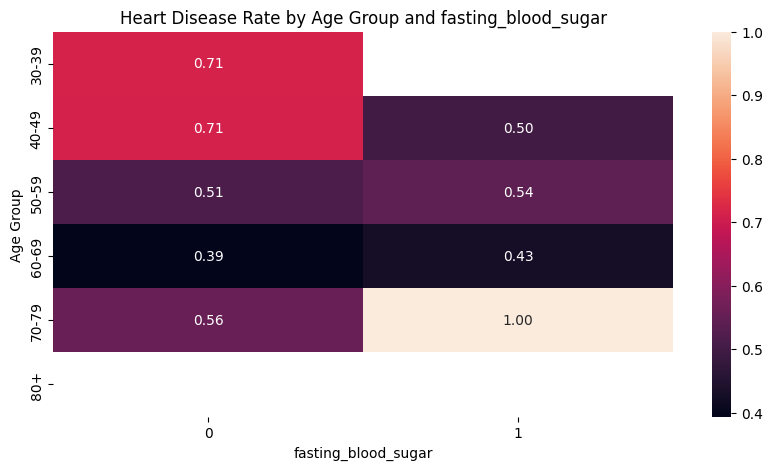

/tmp/ipython-input-1957496703.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', col])['heart_disease'].mean().unstack()


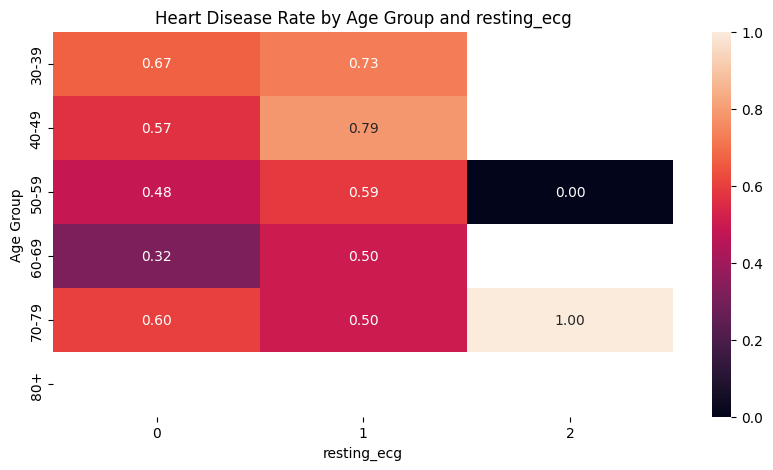

/tmp/ipython-input-1957496703.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', col])['heart_disease'].mean().unstack()


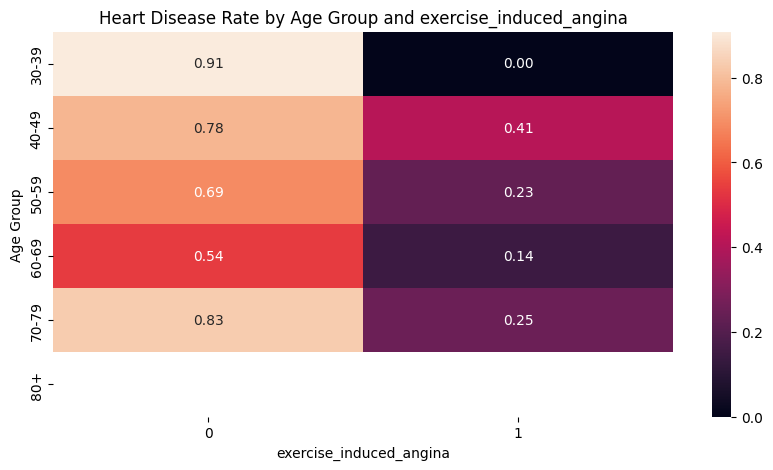

/tmp/ipython-input-1957496703.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', col])['heart_disease'].mean().unstack()


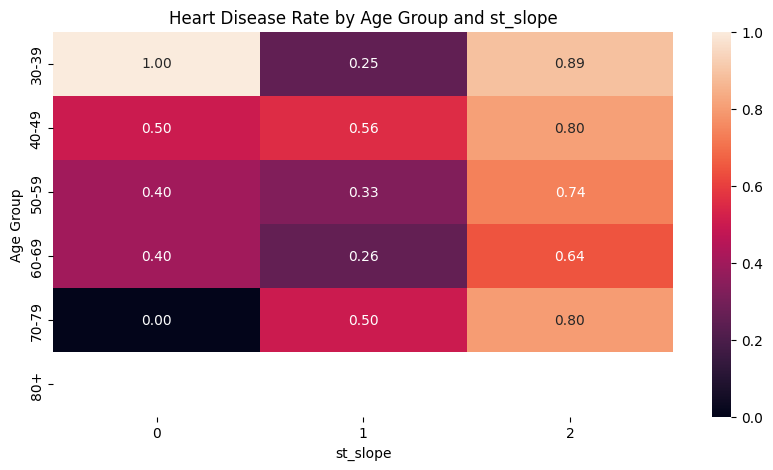

/tmp/ipython-input-1957496703.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', col])['heart_disease'].mean().unstack()


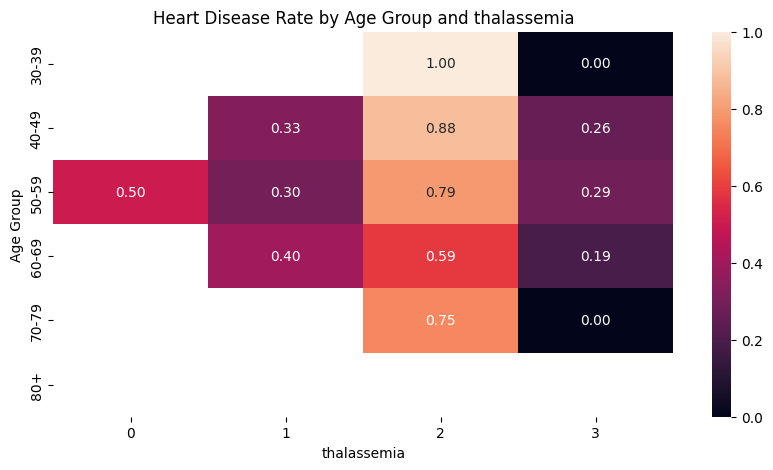

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


bins = [29, 39, 49, 59, 69, 79, 89]
labels = ['30-39','40-49','50-59','60-69','70-79','80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

for col in categorical_cols:
    plt.figure(figsize=(10,5))

    # Group by age_group and the categorical variable, calculate mean heart disease
    grouped = df.groupby(['age_group', col])['heart_disease'].mean().unstack()

    sns.heatmap(grouped, annot=True, fmt=".2f", cmap='rocket')
    plt.title(f'Heart Disease Rate by Age Group and {col}')
    plt.ylabel('Age Group')
    plt.xlabel(col)
    plt.show()

**Variables relationship with Age** (2 High-risk and 1 Low-risk)

---



**Sex** (High risk) : Have high correlation with age when sex = female. Meaning, most female age group have heart disease in this dataset, where else age group 50-59 & 60-69 have relatively risk compared to other age. (0.71, 0.61) respectively. Men tend to have less heart disease as you go up in age.

---



**Chest Pain Type** (High risk) :
*   **Age group by chest pain type = 0**, tend to follow the same correlation with most age groups, around 0.20-0.26. However, age 40-49 have double the amount 0.43. It is still relatively low.

*   **Age group by chest pain type = 1**, tend to follow the same correlation with most age groups, around 0.95-1.00. Extremely high. However, age group 50-59 have a relatively high correlation, 0.71, and age group 60-69 have a moderately risk with a 0.5.
*   **Age group by chest pain type = 2**, tend to follow a decreasing slope as age group increases. Age group 30-39, have a 1.00(Guaranteed). Age group 40-49 & Age group 50-59 both have 0.82(High). Age group 60-69 & Age group 70-79 both have 0.67(Moderately-High). Having high correlation but a decreasing rate as age increases.
*   **Age group by chest pain type = 3**, tend to follow a increasing slope as age group increases. Age group 30-39 having 0.5 (moderate), Age group 40-49 & 50-59 having 0.67 (Moderately-High), Age group 60-69 having 0.78 (High). Age group (70-79) does not have any patients in the dataset.

---







# **TRAIN TEST SPLIT FROM SCKITT-LEARN**
*   **TRAIN (70%)** : Process by which a machine learning model learns patterns from labeled data and make adjustment to its parameters to minimize prediction errors.
*   **VALIDATION (15%)** : Compares training models to find the best model to prevent overfitting
*   **TEST (15%)**: Uses reserved unused portion of the dataset for the final evaluation of the chosen model. Gives unbiased result. Helps to show how overfitting or underfitting the training-validation was.

**Split into 70%/15%/15% because dataset is small (320+sample). This ensures enough data for the model to learn patterns, while keeping validation and split large enough to reliably evalute the performance.**


In this case, we do not have any learning models, therefore validation is done to keep a reliable split.






---



In [46]:
import pandas as pd

df = pd.read_csv("/content/heart.csv", sep=";")

if df.shape[1] == 1:
    df = df.iloc[:, 0].str.split(",", expand=True)

df.columns = [
    "age","sex","chest_pain_type","resting_blood_pressure","serum_cholesterol",
    "fasting_blood_sugar","resting_ecg","max_heart_rate","exercise_induced_angina",
    "st_depression","st_slope","num_major_vessels","thalassemia","heart_disease"
]

df.columns = [col.strip() for col in df.columns]

df = df.apply(pd.to_numeric)

df.head() ##Re-doing data columns to prevent any mess-ups

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
from sklearn.model_selection import train_test_split

#Step 1: Making X and Y axis.
X = df.drop('heart_disease', axis=1)
Y = df['heart_disease']

#Step 2: First split: 70% Train, 30% Temporary
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y,
    test_size=0.30, ##Put them into 30% temporary section
    stratify=Y, ##Ensures equal amount of non heart_disease patiten and heart_disease patient
    random_state=42 #Randomizing to prevent biasness
)

#Step 3: Second Split: 15% Validation, 15% Test
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp,
    test_size = 0.50, #Put them into 15% test
    stratify = Y_temp,
    random_state = 42
)
# Step 4: Check the sizes
print("Training set:", X_train.shape, Y_train.shape)
print("Validation set:", X_val.shape, Y_val.shape)
print("Test set:", X_test.shape, Y_test.shape)

# Step 5: Check class distribution (optional but good for medical data)
print("\nTarget distribution in training set:\n", Y_train.value_counts(normalize=True))
print("Target distribution in validation set:\n", Y_val.value_counts(normalize=True))
print("Target distribution in test set:\n", Y_test.value_counts(normalize=True))



Training set: (212, 13) (212,)
Validation set: (45, 13) (45,)
Test set: (46, 13) (46,)

Target distribution in training set:
 heart_disease
1    0.542453
0    0.457547
Name: proportion, dtype: float64
Target distribution in validation set:
 heart_disease
1    0.555556
0    0.444444
Name: proportion, dtype: float64
Target distribution in test set:
 heart_disease
1    0.543478
0    0.456522
Name: proportion, dtype: float64


**Shows that stratification works, all having around the same split with people with heart_disease and people who do not have heart disease.**

---



#FIRST MACHINE LEARNING MODEL
**LOGICAL REGRESSION**

---

*   Used when the target variable is categorical, usually binary(0 = no heart disease, 1 = heart disease)
*   Predicts the probability that a data points belongs to a certain class
---

*   All features are multiplied by weight eg(z = w1​x1 ​+ w2​x2 ​+ … +wn​xn​ +b)
*   Then applied with sigmoid function which converts the features X weight into a probability between 0 and 1
P(y=1)=1/1+e^−z1​


    *   If P≥ 0.5 → predict class 1 (heart disease)
    *   If P < 0.5 → predict class 0 (no heart disease)


---










In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #Important to find the results

#Step 1: Initialize Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

#Step 2: Train the model
lr_model.fit(X_train, Y_train)

#Step 3: Validate on the validation set
Y_val_pred = lr_model.predict(X_val)

#Evalute Performance
print("Validation Accuracy:", accuracy_score(Y_val, Y_val_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_val, Y_val_pred))
print("\nClassification Report:")
print(classification_report(Y_val, Y_val_pred))

Validation Accuracy: 0.7555555555555555

Confusion Matrix:
[[15  5]
 [ 6 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.79      0.76      0.78        25

    accuracy                           0.76        45
   macro avg       0.75      0.76      0.75        45
weighted avg       0.76      0.76      0.76        45



**Logistic Regression gave me the result of estimated 76% Validation Accuracy,
now to compare it to another machine learning model.**

---

# K-Nearest Neighbors (KNN)
*   Pick a random data in the dataset and check its nearest K neighbors.
*   If overall conclusion is either (0 = No heart disease, 1 = Heart disease) of the selected data and its K neighbors, then it will be its respective conclusion.





In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Finding the best K by testing all k out.
k_values = range(1,21)
validation_accuracies =[]

for k in k_values:

    # Initialize KNN with current K
    knn = KNeighborsClassifier(n_neighbors=k)

    #Train the model
    knn.fit(X_train, Y_train)

    #Validate on validation set
    Y_val_pred = knn.predict(X_val)
    acc = accuracy_score(Y_val, Y_val_pred)
    validation_accuracies.append(acc)

# Find the best K
best_k = k_values[validation_accuracies.index(max(validation_accuracies))]
print(f"Best K: {best_k} with validation accuracy: {max(validation_accuracies):.4f}")

#Train final KNN model using best K
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, Y_train)

#Validate final KNN model using best K
Y_val_pred = knn_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(Y_val, Y_val_pred))





Best K: 16 with validation accuracy: 0.7333
Validation Accuracy: 0.7333333333333333


**K-Nearest Neighbors gave me the result of estimated 73% Validation Accuracy. Therefore, I will use Logistic Regression as it has a higher validation accuracy to prevent overfitting.**

---



In [69]:
# Predict on test set
Y_test_pred = lr_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_test_pred))

Test Accuracy: 0.7391304347826086

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.72      0.84      0.78        25

    accuracy                           0.74        46
   macro avg       0.74      0.73      0.73        46
weighted avg       0.74      0.74      0.74        46



# **Conclusion:** Validation accuracy (76%) & Test Accuracy (74%). Therefore good fitting. Indicating Logistic Regression model works well without overfitting.


---



# To improve my training  and test scores. I am going to change logistic regression with feature scaling and class balancing.


* Scales all features → improves Logistic Regression performance

* Class weighting → handles slight class imbalance automatically

---




In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression
# Added class_weight='balanced' in case of slight class imbalance
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Train the model on scaled training data
lr_model.fit(X_train_scaled, Y_train)

# Validate on the scaled validation set
Y_val_pred = lr_model.predict(X_val_scaled)

# Evaluate validation performance
print("Validation Accuracy:", accuracy_score(Y_val, Y_val_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_val, Y_val_pred))
print("\nClassification Report:")
print(classification_report(Y_val, Y_val_pred))

# Test set evaluation
y_test_pred = lr_model.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(Y_test, Y_test_pred))
print("\nClassification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred))

Validation Accuracy: 0.7777777777777778

Confusion Matrix:
[[15  5]
 [ 5 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.80      0.80      0.80        25

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45

Test Accuracy: 0.7391304347826086

Confusion Matrix (Test Set):
[[13  8]
 [ 4 21]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.72      0.84      0.78        25

    accuracy                           0.74        46
   macro avg       0.74      0.73      0.73        46
weighted avg       0.74      0.74      0.74        46



**This led the an increase accuracy in validation accuracy to 78% while Test
accuracy remains at 74%.**

---

